In [9]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [10]:
from pydsge import DSGE, example

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from grgrlib import pplot

import os

In [11]:
config = {
    'figure.figsize':(10,3),
    'figure.dpi':144,
    'figure.facecolor':'white',
    'axes.grid':True,
    'grid.linestyle':'--',
    'grid.linewidth':0.5,
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False
}

plt.rcParams.update(config)

Loading model

In [12]:
mod = DSGE.read(example[0])
data = pd.read_csv(example[1])
# mod = DSGE.read(os.path.join(MODEL_DIR, 'pydsge_mod1.yaml'))

In [13]:
mod.get_par(asdict=True)

({'beta': 0.99,
  'theta': 0.66,
  'sigma': 1.5,
  'phi_pi': 1.7,
  'phi_y': 0.125,
  'rho': 0.8,
  'rho_u': 0.8,
  'rho_z': 0.9,
  'rho_r': 0.7,
  'sig_u': 0.5,
  'sig_z': 0.3,
  'sig_r': 0.3,
  'psi': 0.3,
  'nub': 0.1,
  'y_mean': 0.35,
  'pi_mean': 0.5,
  'elb_level': 0.07},
 {'kappa': 0.17855, 'eta': 2.11111, 'nu': 0.11111, 'x_bar': -0.9401})

In [14]:
par = mod.set_par('calib')
par

array([0.99 , 0.66 , 1.5  , 1.7  , 0.125, 0.8  , 0.8  , 0.9  , 0.7  ,
       0.5  , 0.3  , 0.3  , 0.3  , 0.1  , 0.35 , 0.5  , 0.07 ])

IRF simulations

In [15]:
shock_list = ('e_u', 4.0, 0) # (name, size, period)
X1, (L1, K1), _ = mod.irfs(shock_list, verbose=True)

In [16]:
# sampling from priors
par0 = mod.get_par('prior', nsamples=100, verbose=True)

Adding parameters to the prior distribution...
   - theta as beta (0.5, 0.1). Init @ 0.7813, with bounds (0.2, 0.95)
   - sigma as normal (1.5, 0.375). Init @ 1.2312, with bounds (0.25, 3)
   - phi_pi as normal (1.5, 0.25). Init @ 1.7985, with bounds (1.0, 3)
   - phi_y as normal (0.125, 0.05). Init @ 0.0893, with bounds (0.001, 0.5)
   - rho_u as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho_r as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho_z as beta (0.5, 0.2). Init @ 0.7, with bounds (0.01, 0.9999)
   - rho as beta (0.75, 0.1). Init @ 0.8, with bounds (0.5, 0.975)
   - sig_u as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.025, 5)
   - sig_r as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.01, 3)
   - sig_z as inv_gamma_dynare (0.1, 2). Init @ 0.5, with bounds (0.01, 3)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.32s/it]

(prior_sample:) Sampling done. Check fails for 1.96% of the prior.


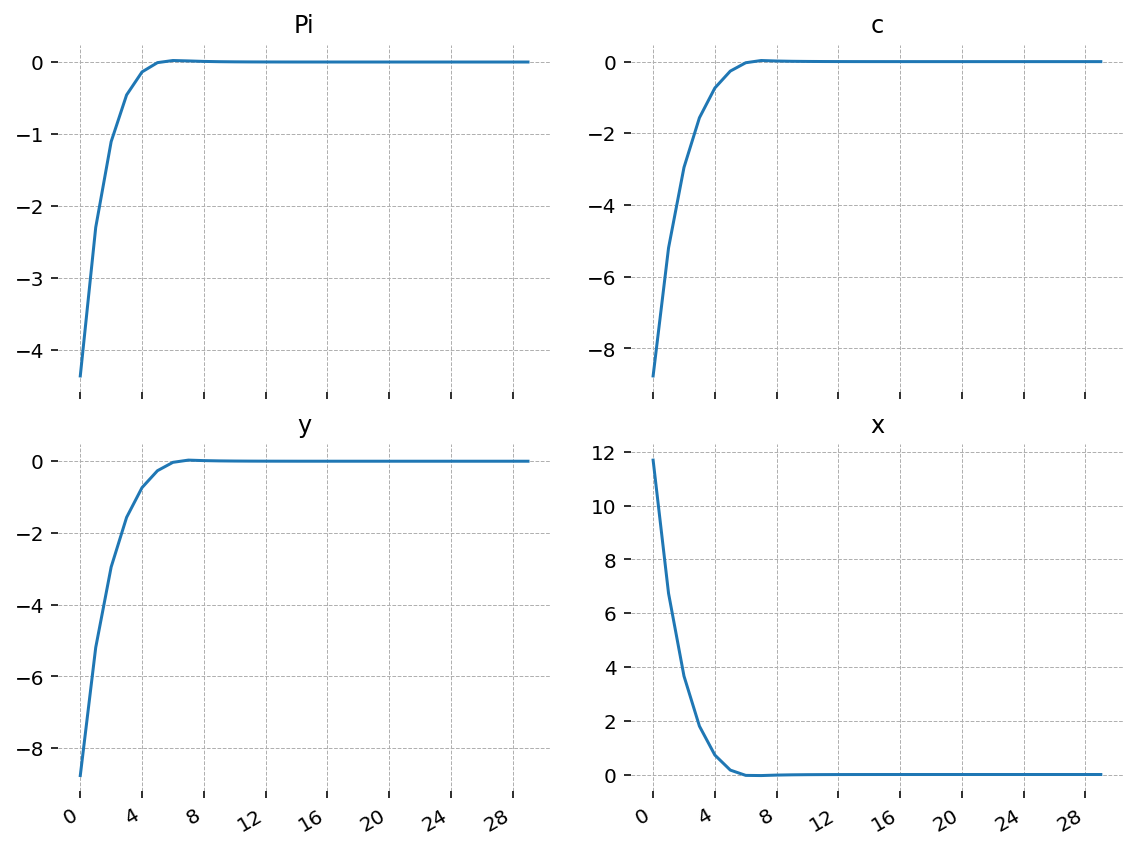

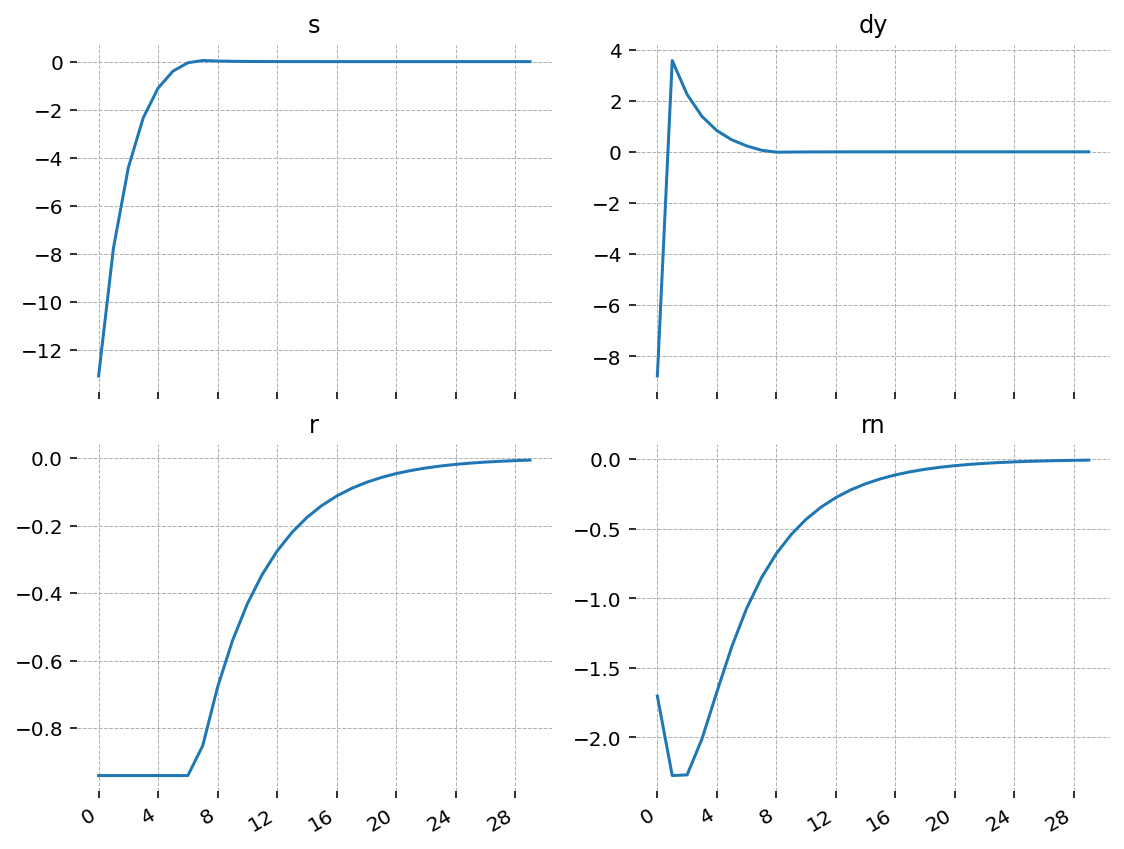

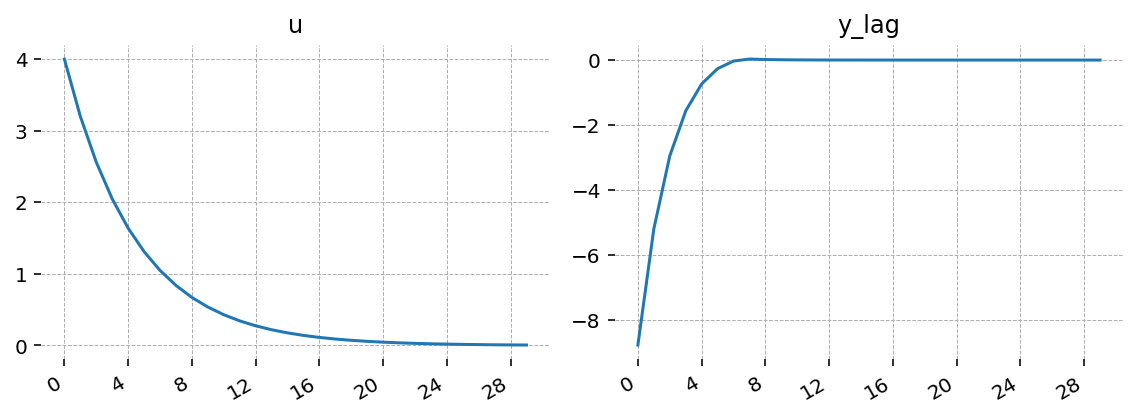

In [17]:
figs, axs, _ = pplot(X1)

[irfs:]        No OBC solution(s) found.


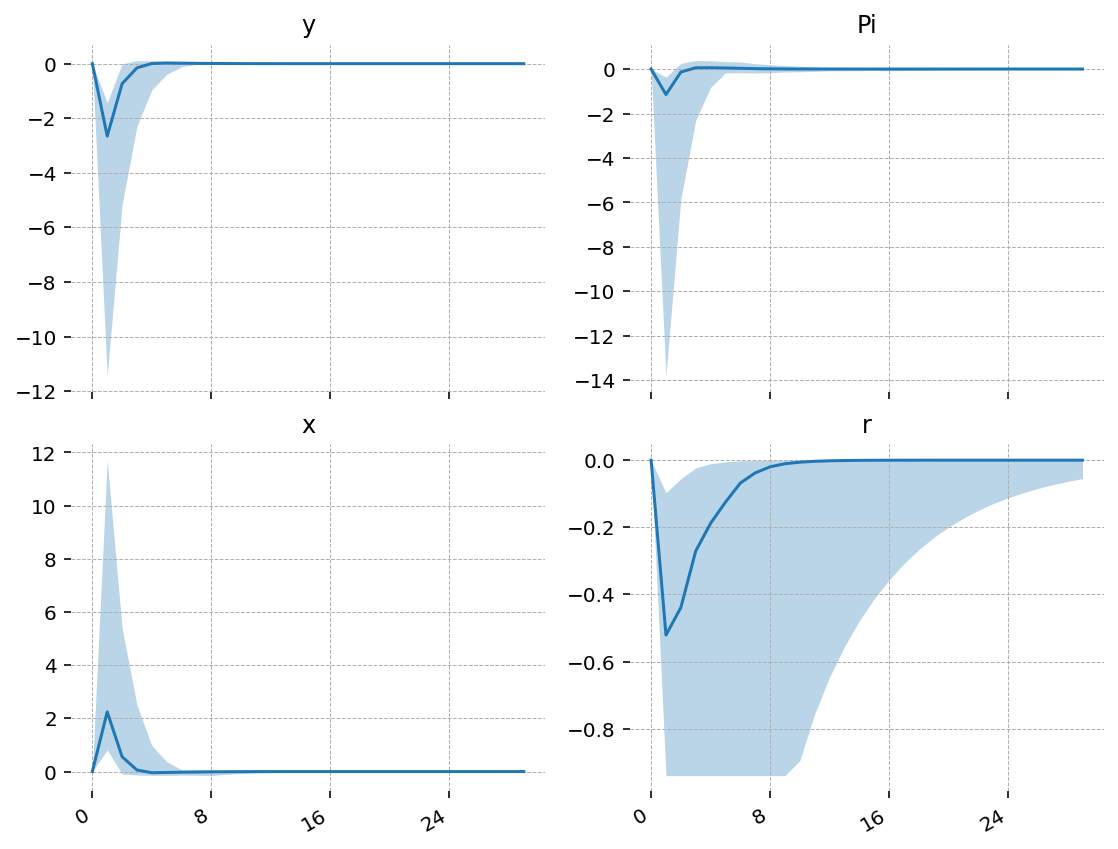

In [18]:
mod.set_par('calib')
shock_list = ('e_u', 3., 1) # (name, size, period)

X1, LK1, _ = mod.irfs(shock_list, par0, verbose=True)
v = mod.vix(('y','Pi','x','r')) # get the indices of these four variables
figs, axs, _ = pplot(X1[...,v], labels=mod.vv[v])